In [170]:
# Célula 0 — Instalação de dependências

'''
Esta célula é responsável por garantir que todas as bibliotecas externas
necessárias para a execução do notebook estejam instaladas no ambiente.

Contexto:
- Deve ser executada apenas uma vez por ambiente (ou quando houver erro de importação).
- Em ambientes como Jupyter Notebook, Colab ou VS Code, o uso de "!pip install" permite instalar pacotes diretamente no kernel em execução.

Bibliotecas instaladas:
- pandas: manipulação e análise de dados tabulares
- matplotlib: geração de gráficos e visualizações
- openpyxl: leitura e escrita de arquivos Excel (.xlsx)

Observação importante:
- O módulo "os" NÃO precisa (e NÃO deve) ser instalado via pip, pois faz parte da biblioteca padrão do Python.
'''

! pip install pandas matplotlib openpyxl


In [171]:
# Célula 1 — Imports

'''
Esta célula importa as bibliotecas fundamentais utilizadas ao longo do notebook.

Bibliotecas:
- os: manipulação de diretórios e arquivos
- pandas: tratamento e análise de dados
- matplotlib: visualização gráfica
- pathlib: manipulação de caminhos de forma robusta
'''

import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [172]:
# Célula 2 — Conferir diretório atual

'''
Objetivo:
- Verificar o diretório de execução do notebook
- Listar arquivos disponíveis para garantir acesso aos dados

Boa prática para evitar erros de leitura de arquivos.
'''

os.getcwd()
os.listdir()


['analisebase.ipynb',
 'br_seeg_emissoes_brasil.csv',
 'br_seeg_emissoes_brasil.xlsx']

Célula 2.1 — Guia de Leitura do Notebook (MD)
## Guia de Leitura do Notebook

Este notebook está estruturado em blocos analíticos progressivos,
permitindo leitura sequencial ou direcionada.

### Estrutura geral:
- **Células 0–2**: Preparação do ambiente
- **Células 3–6**: Carga e compreensão dos dados
- **Células 7–8**: Engenharia temporal
- **Células 9.x**: Análises por gás individual (visão técnica)
- **Células 10.x**: Análises por grupos de gases (visão executiva)
- **Células 11+**: Visualizações e comunicação de resultados


In [173]:
# Célula 3 — Leitura do arquivo Excel

'''
Carrega o dataset de emissões para análise.
'''

arquivo = "br_seeg_emissoes_brasil.xlsx"
df = pd.read_excel(arquivo)
df.head()

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,23046217.0
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,2260163.0
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,2201012.0
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,21419556.0
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,18686284.0


In [174]:
# Célula 4 — Seleção e padronização

'''
Esta célula:
- Seleciona apenas as colunas relevantes para a análise
- Garante que o campo "ano" esteja no formato numérico

Isso simplifica as agregações e visualizações futuras.
'''

df = df[["ano", "gas", "emissao"]]
df["ano"] = df["ano"].astype(int)
df.head()


,ano,gas,emissao
0,1970,CH4 (t),23046217.0
1,1971,CH4 (t),2260163.0
2,1972,CH4 (t),2201012.0
3,1973,CH4 (t),21419556.0
4,1974,CH4 (t),18686284.0


In [175]:
# Célula 5 — Base agregada

'''
Agrega os dados por:
- Ano
- Tipo de gás

Somando o total de emissões para cada combinação.
Essa será a base central para os gráficos anuais.
'''

df_agrupado = (
    df.groupby(["ano", "gas"], as_index=False)["emissao"]
    .sum()
)

df_agrupado.head()


,ano,gas,emissao
0,1970,C2F6 (t),1.395662e+06
1,1970,CF4 (t),2.134453e+07
2,1970,CH4 (t),4.998021e+09
3,1970,CO (t),4.356296e+09
4,1970,CO2 (t),3.151364e+09


In [176]:
# Célula 6 — Pivot anual por gás

'''
Converte a base agregada para formato pivot:

- Linhas: ano
- Colunas: tipo de gás
- Valores: emissão total

Formato ideal para gráficos de linha, área e comparações temporais.
'''

df_pivot_ano = (
    df_agrupado
    .pivot(index="ano", columns="gas", values="emissao")
    .fillna(0)
)

df_pivot_ano.head()


gas,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GWP-AR2,CO2e (t) GWP-AR4,...,HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOX (t),NOx (t),SF6 (t)
ano,,,,,,,,,,,,,,,,,,,,,
1970,1395662.0,21344527.0,4.998021e+09,4.356296e+09,3.151364e+09,8.446847e+09,8.446847e+09,8.912825e+09,8.740833e+09,8.843895e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,6.259624e+09,74152424.0,4.823507e+09,0.0
1971,20076635.0,30704159.0,5.664296e+09,4.495005e+09,3.538648e+09,8.614891e+09,8.614891e+09,8.982922e+09,8.877645e+09,8.914878e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,6.125749e+09,76952860.0,4.796126e+09,0.0
1972,24281036.0,3713415.0,4.857771e+09,4.719047e+09,3.588300e+09,8.482554e+09,8.482554e+09,7.763721e+09,8.945695e+09,8.911037e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,6.058068e+09,79753295.0,4.680756e+09,0.0
1973,2778885.0,42498817.0,5.615892e+09,4.302412e+09,3.725942e+09,8.946097e+09,8.946097e+09,8.749177e+09,9.036947e+09,9.116011e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,5.875318e+09,82553731.0,4.693780e+09,0.0
1974,28261534.0,43221715.0,5.674398e+09,5.142865e+09,3.940045e+09,9.203126e+09,9.203126e+09,9.090832e+09,9.396800e+09,9.383082e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,6.086331e+09,85354167.0,4.876841e+09,0.0


# Célula 6.1 — Unidade da Variável Emissão

A variável **emissao** representa o volume de emissões de gases de efeito estufa expresso em:

**Milhões de toneladas (Mt)**  

Todas as agregações e gráficos mantêm essa unidade de forma consistente.

In [177]:
# Célula 7 — Criação dos períodos

'''
Cria colunas auxiliares para agregação temporal:

- periodo_5_anos: análises de médio prazo
- periodo_10_anos: análises estratégicas
- periodo_30_anos: análises históricas e estruturais

Esses períodos reduzem ruído e facilitam leitura executiva.
'''

df_agrupado["periodo_5_anos"]  = (df_agrupado["ano"] // 5) * 5
df_agrupado["periodo_10_anos"] = (df_agrupado["ano"] // 10) * 10
df_agrupado["periodo_30_anos"] = (df_agrupado["ano"] // 30) * 30

df_agrupado.head()


,ano,gas,emissao,periodo_5_anos,periodo_10_anos,periodo_30_anos
0,1970,C2F6 (t),1.395662e+06,1970,1970,1950
1,1970,CF4 (t),2.134453e+07,1970,1970,1950
2,1970,CH4 (t),4.998021e+09,1970,1970,1950
3,1970,CO (t),4.356296e+09,1970,1970,1950
4,1970,CO2 (t),3.151364e+09,1970,1970,1950


In [178]:
# Célula 7.1 — Criação do Período de 5 em 5 anos

'''
Esta célula cria uma dimensão temporal de médio prazo,
agrupando os anos em blocos de 5 anos.

Objetivo:
- Reduzir volatilidade anual
- Facilitar análises estruturais
- Servir de base para agregações e gráficos de tendência

Exemplo:
1990 → 1990–1994
1991 → 1990–1994
'''

df["ano_5"] = (df["ano"] // 5) * 5
df["periodo_5_anos"] = (
    df["ano_5"].astype(str) + "–" + (df["ano_5"] + 4).astype(str)
)

df[["ano", "periodo_5_anos"]].drop_duplicates().head(10)



,ano,periodo_5_anos
0,1970,1970–1974
1,1971,1970–1974
2,1972,1970–1974
3,1973,1970–1974
4,1974,1970–1974
5,1975,1975–1979
6,1976,1975–1979
7,1977,1975–1979
8,1978,1975–1979
9,1979,1975–1979


In [179]:
# Célula 7.2 — Criação do Período de 10 em 10 anos
'''
Esta célula cria uma dimensão temporal de longo prazo (décadas),
agrupando os anos em blocos de 10 anos.

Objetivo:
- Reduzir volatilidade anual
- Facilitar análises de ciclos históricos
- Servir de base para agregações estratégicas

Exemplo:
1990 → 1990–1999
1991 → 1990–1999
'''
df["ano_10"] = (df["ano"] // 10) * 10
df["periodo_10_anos"] = (
    df["ano_10"].astype(str) + "–" + (df["ano_10"] + 9).astype(str)
)
df[["ano", "periodo_10_anos"]].drop_duplicates().head(10)

,ano,periodo_10_anos
0,1970,1970–1979
1,1971,1970–1979
2,1972,1970–1979
3,1973,1970–1979
4,1974,1970–1979
5,1975,1970–1979
6,1976,1970–1979
7,1977,1970–1979
8,1978,1970–1979
9,1979,1970–1979


In [180]:
# Célula 7.3 — Criação do Período de 30 em 30 anos
'''
Cria uma dimensão temporal de altíssimo nível (30 anos), agrupando os anos em blocos de 30 anos.
Objetivo:
- Visão macroambiental
- Análise de transformações estruturais
- Relatórios executivos e institucionais
Exemplo: 1970 → 1970–1999, 2000 → 2000–2029
'''
df["ano_30"] = (df["ano"] // 30) * 30
df["periodo_30_anos"] = (
    df["ano_30"].astype(str) + "–" + (df["ano_30"] + 29).astype(str)
)
df[["ano", "periodo_30_anos"]].drop_duplicates().head(10)

,ano,periodo_30_anos
0,1970,1950–1979
1,1971,1950–1979
2,1972,1950–1979
3,1973,1950–1979
4,1974,1950–1979
5,1975,1950–1979
6,1976,1950–1979
7,1977,1950–1979
8,1978,1950–1979
9,1979,1950–1979


In [181]:
# Célula 8 — Bases derivadas

'''
Cria cópias da base agregada para clareza semântica.

Cada DataFrame será utilizado em um tipo específico
de agregação temporal.
'''

df_agrupado_5_anos  = df_agrupado.copy()
df_agrupado_10_anos = df_agrupado.copy()
df_agrupado_30_anos = df_agrupado.copy()


In [182]:
# Célula 9.1 — Pivot por Gás (5 em 5 anos)

'''
Prepara a base para análises de médio prazo.

Processo:
- Agrupamento por período de 5 anos e gás
- Soma das emissões
- Conversão para formato pivot

Uso típico:
- Gráficos de linha e área com menor volatilidade
'''

df_pivot_5_anos = (
    df
    .groupby(["periodo_5_anos", "gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_5_anos.head()

gas,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GWP-AR2,CO2e (t) GWP-AR4,...,HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOX (t),NOx (t),SF6 (t)
periodo_5_anos,,,,,,,,,,,,,,,,,,,,,
1970–1974,76793752.0,141482633.0,2.681038e+10,2.301562e+10,1.794430e+10,4.369351e+10,4.369351e+10,4.349948e+10,4.499792e+10,4.516890e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,3.040509e+10,398766477.0,2.387101e+10,0.0
1975–1979,179425910.0,274404627.0,3.040979e+10,2.766947e+10,2.453556e+10,5.117312e+10,5.117312e+10,5.157665e+10,5.212823e+10,5.208565e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,3.301309e+10,385713072.0,2.665741e+10,0.0
1980–1984,426197118.0,361821242.0,3.873608e+10,3.316761e+10,3.270048e+10,6.177736e+10,6.177736e+10,6.265397e+10,6.099634e+10,6.189011e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,3.891226e+10,549923659.0,3.402241e+10,0.0
1985–1989,408206070.0,172450164.0,4.247015e+10,3.841416e+10,3.353496e+10,6.205227e+10,6.205227e+10,6.459456e+10,6.513050e+10,6.305931e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,4.303759e+10,755724492.0,4.105352e+10,0.0
1990–1994,470820560.0,165736484.0,3.976869e+10,3.806136e+10,4.176056e+10,7.106317e+10,7.106317e+10,7.283678e+10,7.463775e+10,7.472810e+10,...,0.0,1640.0,0.0,0.0,46206.0,0.0,4.264434e+10,587452554.0,3.649960e+10,418.0


In [183]:
# Célula 9.2 — Pivot por Gás (10 em 10 anos)

'''
Base voltada a análises estratégicas de longo prazo.

Ideal para:
- Identificação de ciclos históricos
- Comparações entre décadas
- Relatórios executivos
'''

df_pivot_10_anos = (
    df
    .groupby(["periodo_10_anos", "gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_10_anos.head()

gas,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GWP-AR2,CO2e (t) GWP-AR4,...,HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOX (t),NOx (t),SF6 (t)
periodo_10_anos,,,,,,,,,,,,,,,,,,,,,
1970–1979,256219662.0,4.158873e+08,5.722017e+10,5.068510e+10,4.247986e+10,9.486664e+10,9.486664e+10,9.507612e+10,9.712615e+10,9.725455e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,6.341818e+10,7.844795e+08,5.052842e+10,0.0
1980–1989,834403188.0,5.342714e+08,8.120622e+10,7.158177e+10,6.623544e+10,1.238296e+11,1.238296e+11,1.272485e+11,1.261268e+11,1.249494e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,8.194984e+10,1.305648e+09,7.507593e+10,0.0
1990–1999,833462734.0,5.433699e+08,7.847599e+10,7.438898e+10,8.614018e+10,1.462134e+11,1.462134e+11,1.488602e+11,1.510258e+11,1.514265e+11,...,0.0,63278.0,0.0,0.0,90966.0,0.0,8.453271e+10,6.318506e+08,7.224636e+10,1162.0
2000–2009,916422796.0,1.115858e+09,8.597986e+10,7.640134e+10,8.880178e+10,1.508789e+11,1.508789e+11,1.490947e+11,1.555016e+11,1.565718e+11,...,13385.0,322092.0,11452.0,3186.0,0.0,1632.0,9.171605e+10,1.080863e+08,7.727239e+10,3172.0
2010–2019,731445755.0,8.138590e+08,9.777839e+10,8.310586e+10,8.042540e+10,1.531326e+11,1.531326e+11,1.534175e+11,1.534309e+11,1.559935e+11,...,588277739.0,711832888.0,546231035.0,0.0,0.0,78729.0,9.910962e+10,1.202690e+08,8.817348e+10,7202.0


In [184]:
# Célula 9.3 — Pivot por Gás (30 em 30 anos)

'''
Base para análises macroambientais e históricas.

Objetivo:
- Evidenciar transformações estruturais
- Suportar análises de altíssimo nível (políticas públicas, cenários)
'''

df_pivot_30_anos = (
    df
    .groupby(["periodo_30_anos", "gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_30_anos.head()


gas,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GWP-AR2,CO2e (t) GWP-AR4,...,HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOX (t),NOx (t),SF6 (t)
periodo_30_anos,,,,,,,,,,,,,,,,,,,,,
1950–1979,2.562197e+08,4.158873e+08,5.722017e+10,5.068510e+10,4.247986e+10,9.486664e+10,9.486664e+10,9.507612e+10,9.712615e+10,9.725455e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,6.341818e+10,7.844795e+08,5.052842e+10,0.0
1980–2009,2.584289e+09,2.193500e+09,2.456621e+11,2.223721e+11,2.411774e+11,4.209219e+11,4.209219e+11,4.252035e+11,4.326542e+11,4.329477e+11,...,13385.0,385370.0,11452.0,3186.0,90966.0,1632.0,2.581986e+11,2.045585e+09,2.245947e+11,4334.0
2010–2039,7.314458e+08,8.138590e+08,9.777839e+10,8.310586e+10,8.042540e+10,1.531326e+11,1.531326e+11,1.534175e+11,1.534309e+11,1.559935e+11,...,588277739.0,711832888.0,546231035.0,0.0,0.0,78729.0,9.910962e+10,1.202690e+08,8.817348e+10,7202.0


# Célula 10.0 — Transição da Análise Técnica para Executiva

Até este ponto, as análises foram conduzidas considerando os **gases de efeito estufa individualmente**,
preservando a granularidade técnica do dataset.

A partir da próxima célula, os gases serão **agrupados em categorias estratégicas** amplamente utilizadas em:
- Relatórios executivos
- Inventários ambientais (SEEG, IPCC)
- Comunicação com públicos não técnicos

**Objetivo da transição:**
- Reduzir complexidade visual
- Facilitar comunicação de resultados
- Manter consistência com padrões institucionais

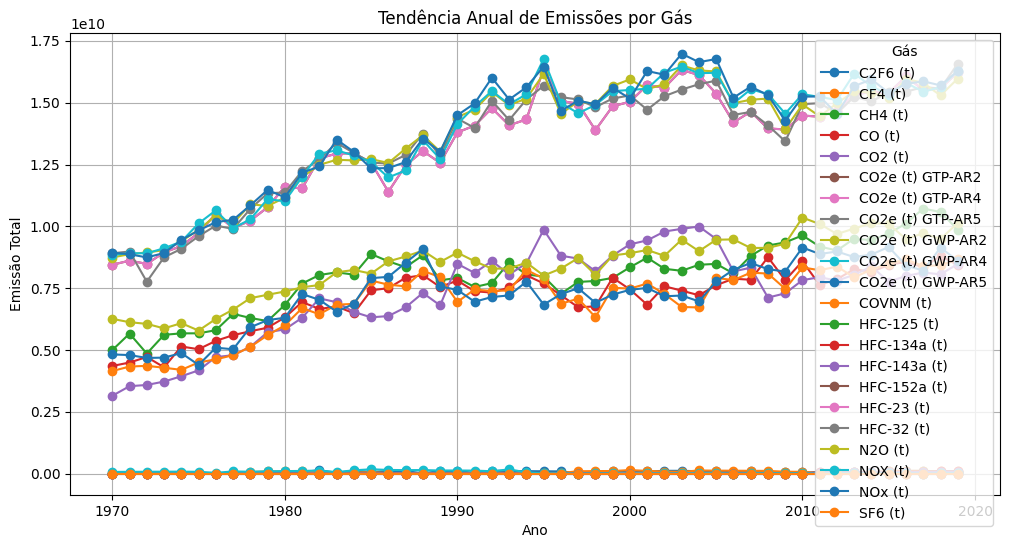

In [185]:
# Célula 10 — Gráfico de Linha (Anual)

'''
Gráfico de linha com granularidade anual.

Leitura:
- Cada linha representa um gás
- Eixo X: ano
- Eixo Y: emissões totais

Uso:
- Análise detalhada
- Identificação de oscilações ano a ano
'''

plt.figure(figsize=(12,6))
df_pivot_ano.plot(ax=plt.gca(), marker="o")

plt.title("Tendência Anual de Emissões por Gás")
plt.xlabel("Ano")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Gás")
plt.show()


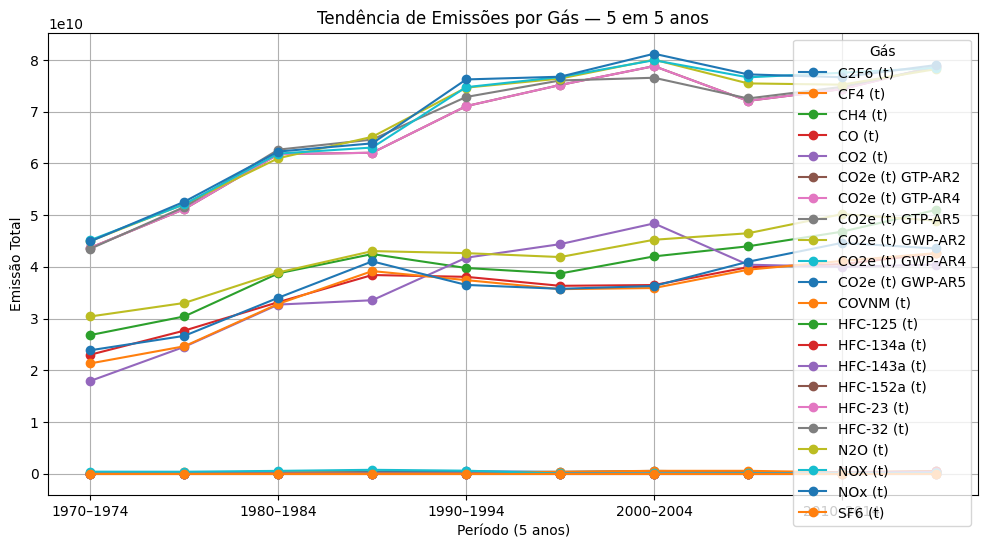

In [186]:
# Célula 10.1 — Gráfico de Linha (5 em 5 anos)

'''
Versão suavizada da tendência temporal.

Benefícios:
- Redução de ruído
- Melhor leitura gerencial
- Evidência de tendências estruturais
'''

plt.figure(figsize=(12,6))
df_pivot_5_anos.plot(ax=plt.gca(), marker="o")

plt.title("Tendência de Emissões por Gás — 5 em 5 anos")
plt.xlabel("Período (5 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Gás")
plt.show()


In [187]:
# Célula 10.1.1 — Agrupamento Semântico de Gases (grupo_gas)

'''
Esta célula cria uma categorização estratégica dos gases originais,
agrupando-os em classes ambientais amplamente utilizadas em relatórios
executivos e análises climáticas.

Objetivo:
- Reduzir granularidade excessiva dos dados
- Facilitar comunicação com públicos não técnicos
- Alinhar a análise a padrões internacionais (ex: IPCC)

Regras de agrupamento:
- Gases que começam com "HFC"      → HFC
- Gases que contêm "CO2"           → CO2 / CO2e
- Gases em {C2F6, CF4}             → PFC
- Demais gases                     → Outros
'''
def classificar_grupo_gas(gas):
    gas = str(gas).upper()
    if gas.startswith("HFC"):
        return "HFC"
    elif "CO2" in gas:
        return "CO2 / CO2e"
    elif gas in ["C2F6", "CF4"]:
        return "PFC"
    elif gas.startswith("SF"):
        return "SF6"
    elif gas.startswith("NF"):
        return "NF3"
    else:
        return "Outros"

df["grupo_gas"] = df["gas"].apply(classificar_grupo_gas)
df[["gas", "grupo_gas"]].drop_duplicates().sort_values("grupo_gas")

,gas,grupo_gas
14150,CO2 (t),CO2 / CO2e
50,CO2e (t) GTP-AR2,CO2 / CO2e
100,CO2e (t) GTP-AR4,CO2 / CO2e
150,CO2e (t) GTP-AR5,CO2 / CO2e
200,CO2e (t) GWP-AR2,CO2 / CO2e
250,CO2e (t) GWP-AR4,CO2 / CO2e
300,CO2e (t) GWP-AR5,CO2 / CO2e
430800,HFC-32 (t),HFC
430750,HFC-23 (t),HFC
430700,HFC-152a (t),HFC


In [188]:
# Célula 10.1.2 — Pivot Anual por Grupo de Gases

'''
Esta célula cria a base de dados agregada anualmente por grupo de gases.

Objetivo analítico:
- Consolidar emissões anuais em categorias estratégicas de gases
- Facilitar análises executivas e comparações de alto nível
- Servir de base para gráficos de linha, área e barras (visão anual)

Estrutura resultante:
- Linhas: Ano
- Colunas: Grupo de Gás (CO2 / CO2e, HFC, PFC, etc.)
- Valores: Soma das emissões anuais
'''

df_pivot_grupo_ano = (
    df
    .groupby(["ano", "grupo_gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_grupo_ano.head()


grupo_gas,CO2 / CO2e,HFC,Outros,SF6
ano,,,,
1970,5.548073e+10,0.0,2.468583e+10,0.0
1971,5.641745e+10,0.0,2.554148e+10,0.0
1972,5.491845e+10,0.0,2.478522e+10,0.0
1973,5.744273e+10,0.0,2.490051e+10,0.0
1974,5.966347e+10,0.0,2.613586e+10,0.0


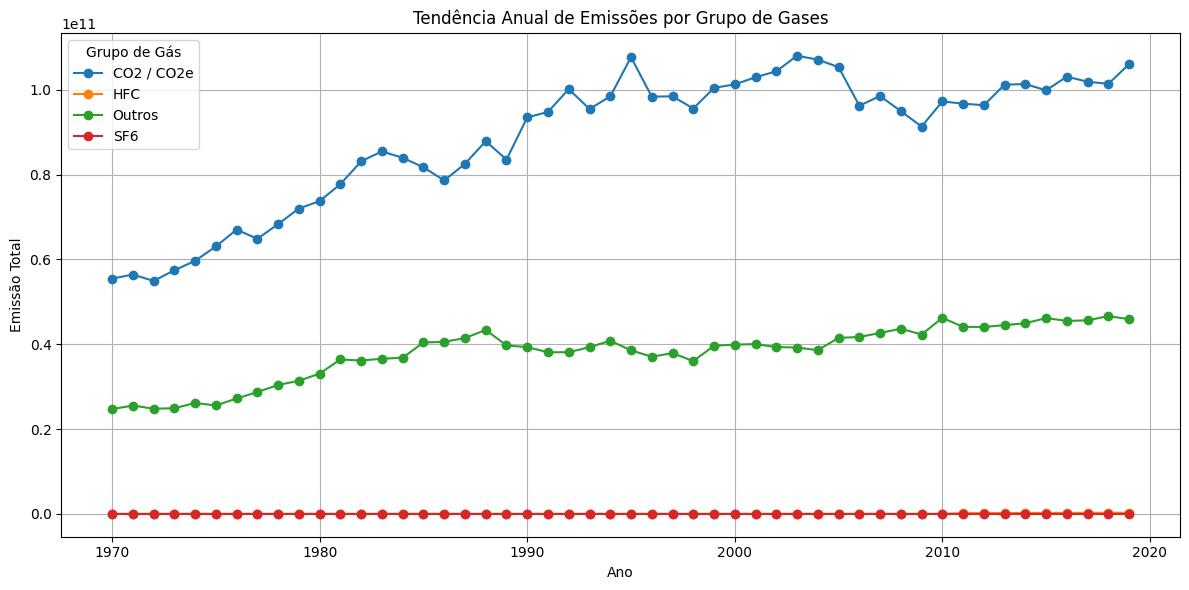

In [189]:
# Célula 10.1.3 — Gráfico de Linha (Tendência Anual por Grupo de Gases)

'''
Gráfico de linha baseado na agregação anual por grupo de gases.

Objetivo executivo:
- Comparar a evolução temporal entre grandes categorias de gases
- Reduzir complexidade visual em relação ao gráfico por gás individual
- Facilitar leitura estratégica (CO2e vs demais grupos)

Leitura do gráfico:
- Cada linha representa um grupo de gases (ex: CO2 / CO2e, HFC, PFC)
- Eixo X: Ano
- Eixo Y: Emissões totais (na unidade original da base)
'''

plt.figure(figsize=(12, 6))
df_pivot_grupo_ano.plot(ax=plt.gca(), marker="o")

plt.title("Tendência Anual de Emissões por Grupo de Gases")
plt.xlabel("Ano")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Grupo de Gás")
plt.tight_layout()

plt.show()


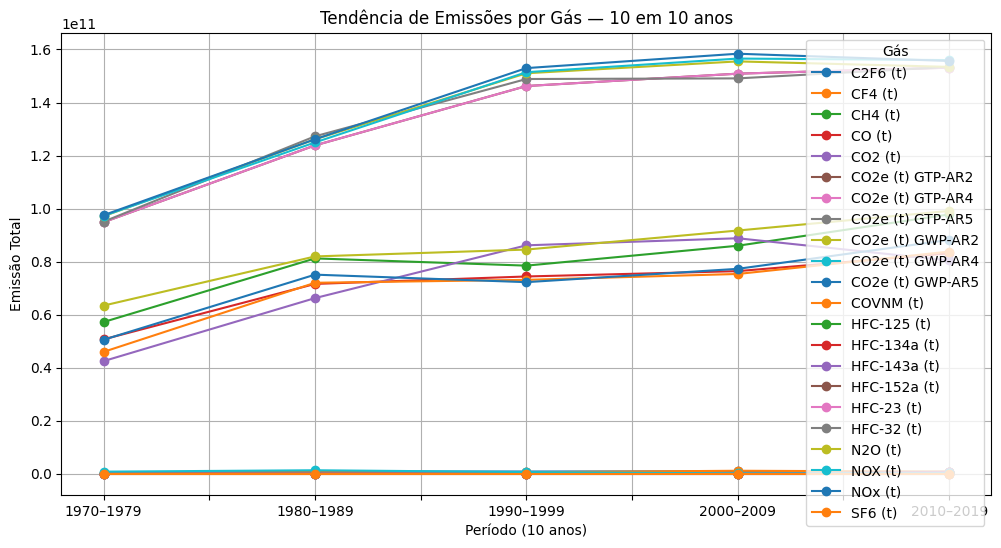

In [190]:
# Célula 10.2 — Gráfico de Linha (10 em 10 anos)

'''
Análise estratégica por décadas.

Indicada para:
- Planejamento de longo prazo
- Avaliação de políticas públicas
'''

plt.figure(figsize=(12,6))
df_pivot_10_anos.plot(ax=plt.gca(), marker="o")

plt.title("Tendência de Emissões por Gás — 10 em 10 anos")
plt.xlabel("Período (10 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Gás")
plt.show()



In [191]:
# Célula 10.2.1 — Pivot por Grupo de Gases (Agregação de 5 em 5 anos)

'''
Esta célula prepara os dados agregados em períodos de 5 anos,
utilizando grupos estratégicos de gases.

Objetivo analítico:
- Suavizar variações anuais
- Evidenciar tendências estruturais de médio prazo
- Melhorar legibilidade em séries temporais longas

Estrutura resultante:
- Linhas: Período de 5 anos (ex: 1990–1994)
- Colunas: Grupo de Gás
- Valores: Emissões totais no período
'''
df_pivot_grupo_5_anos = (
    df
    .groupby(["periodo_5_anos", "grupo_gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_grupo_5_anos.head()


grupo_gas,CO2 / CO2e,HFC,Outros,SF6
periodo_5_anos,,,,
1970–1974,2.839228e+11,0.0,1.260489e+11,0.0
1975–1979,3.352636e+11,0.0,1.432301e+11,0.0
1980–1984,4.040778e+11,0.0,1.790153e+11,0.0
1985–1989,4.142889e+11,0.0,2.054856e+11,0.0
1990–1994,4.823137e+11,47846.0,1.956275e+11,418.0


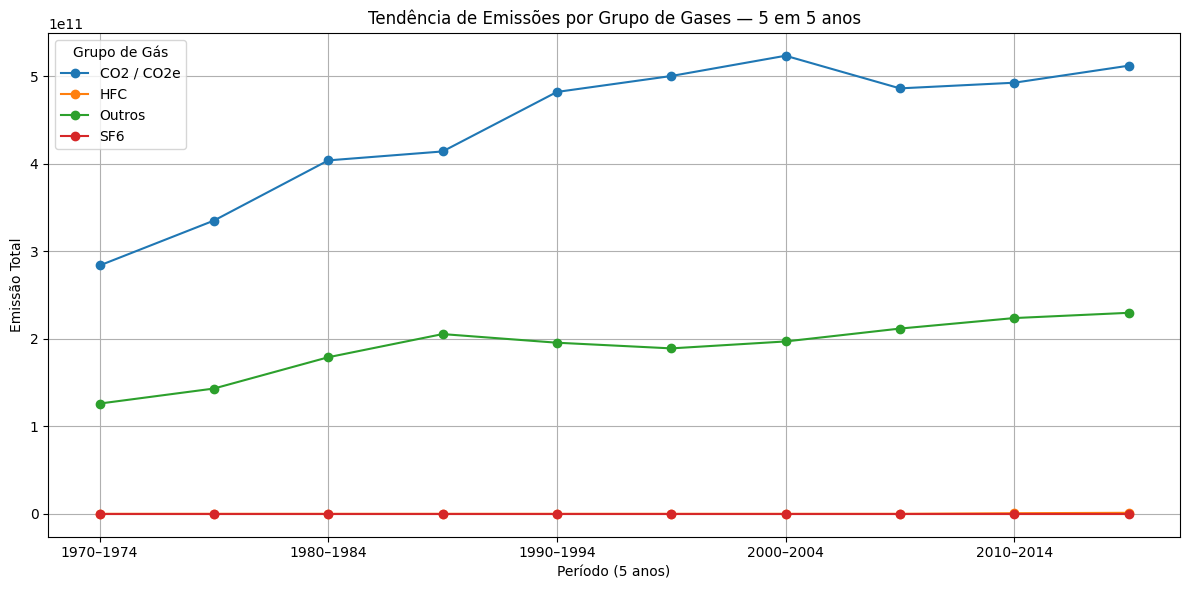

In [192]:
# Célula 10.2.2 — Gráfico de Linha (5 em 5 anos por Grupo de Gases)

'''
Gráfico de linha com agregação temporal de 5 em 5 anos por grupo de gases.

Objetivo executivo:
- Suavizar oscilações anuais
- Evidenciar tendências estruturais de médio prazo
- Apoiar análises gerenciais e comparações interperíodos

Leitura do gráfico:
- Cada linha representa um grupo de gases
- Eixo X: Período de 5 anos
- Eixo Y: Emissões totais agregadas
'''

plt.figure(figsize=(12, 6))
df_pivot_grupo_5_anos.plot(ax=plt.gca(), marker="o")

plt.title("Tendência de Emissões por Grupo de Gases — 5 em 5 anos")
plt.xlabel("Período (5 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Grupo de Gás")
plt.tight_layout()

plt.show()


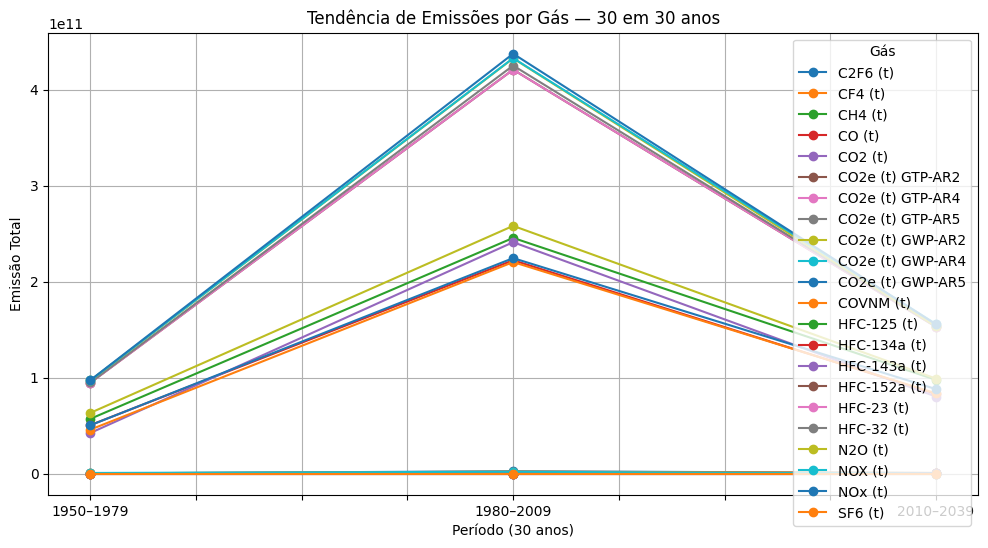

In [193]:
# Célula 10.3 — Gráfico de Linha (30 em 30 anos)

'''
Visão histórica consolidada.

Permite observar:
- Mudanças estruturais profundas
- Padrões de longo prazo
'''

plt.figure(figsize=(12,6))
df_pivot_30_anos.plot(ax=plt.gca(), marker="o")

plt.title("Tendência de Emissões por Gás — 30 em 30 anos")
plt.xlabel("Período (30 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Gás")
plt.show()


In [194]:
# Célula 10.3.1 — Pivot por Grupo de Gases (10 em 10 anos)
'''
Prepara os dados agregados em períodos de 10 anos (décadas) utilizando grupos estratégicos de gases.
Objetivo analítico:
- Evidenciar ciclos históricos
- Reduzir ruído visual
- Apoiar análises estratégicas e relatórios institucionais
'''
df_pivot_grupo_10_anos = (
    df
    .groupby(["periodo_10_anos", "grupo_gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_grupo_10_anos.head()

grupo_gas,CO2 / CO2e,HFC,Outros,SF6
periodo_10_anos,,,,
1970–1979,6.191865e+11,0.000000e+00,2.692790e+11,0.0
1980–1989,8.183668e+11,0.000000e+00,3.845009e+11,0.0
1990–1999,9.828534e+11,1.542440e+05,3.847686e+11,1162.0
2000–2009,1.010124e+12,3.517470e+05,4.088443e+11,3172.0
2010–2019,1.005183e+12,1.846420e+09,4.536035e+11,7202.0


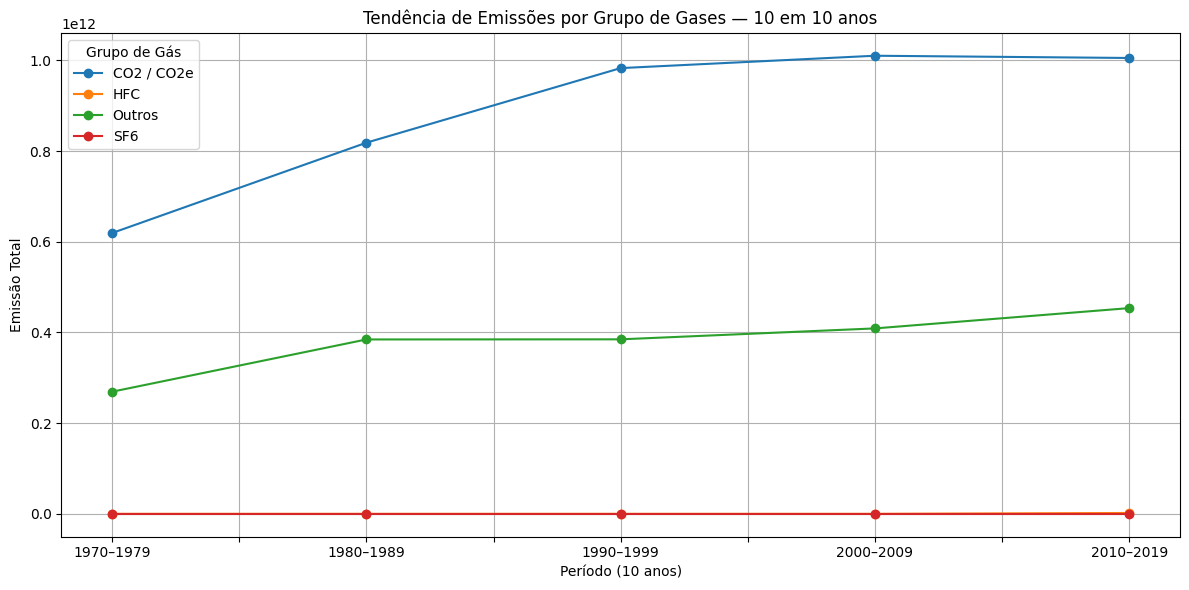

In [195]:
# Célula 10.3.2 — Gráfico de Linha (10 em 10 anos por Grupo de Gases)

'''
Gráfico de linha com agregação por décadas, utilizando grupos de gases.

Objetivo executivo:
- Destacar ciclos históricos de longo prazo
- Reduzir ruído visual em séries extensas
- Apoiar análises estratégicas e relatórios institucionais

Leitura do gráfico:
- Cada linha representa um grupo de gases
- Eixo X: Período de 10 anos
- Eixo Y: Emissões totais agregadas
'''

plt.figure(figsize=(12, 6))
df_pivot_grupo_10_anos.plot(ax=plt.gca(), marker="o")

plt.title("Tendência de Emissões por Grupo de Gases — 10 em 10 anos")
plt.xlabel("Período (10 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Grupo de Gás")
plt.tight_layout()

plt.show()


In [196]:
# Célula 10.4.1 — Pivot por Grupo de Gases (30 em 30 anos)
'''
Prepara os dados agregados em períodos de 30 anos utilizando grupos estratégicos de gases.
Objetivo analítico:
- Visão macroestrutural de longo prazo
- Análise de mudanças profundas na matriz de emissões
- Apoio a políticas públicas e relatórios históricos
'''
df_pivot_grupo_30_anos = (
    df
    .groupby(["periodo_30_anos", "grupo_gas"])["emissao"]
    .sum()
    .unstack(fill_value=0)
)
df_pivot_grupo_30_anos.head()

grupo_gas,CO2 / CO2e,HFC,Outros,SF6
periodo_30_anos,,,,
1950–1979,6.191865e+11,0.000000e+00,2.692790e+11,0.0
1980–2009,2.811344e+12,5.059910e+05,1.178114e+12,4334.0
2010–2039,1.005183e+12,1.846420e+09,4.536035e+11,7202.0


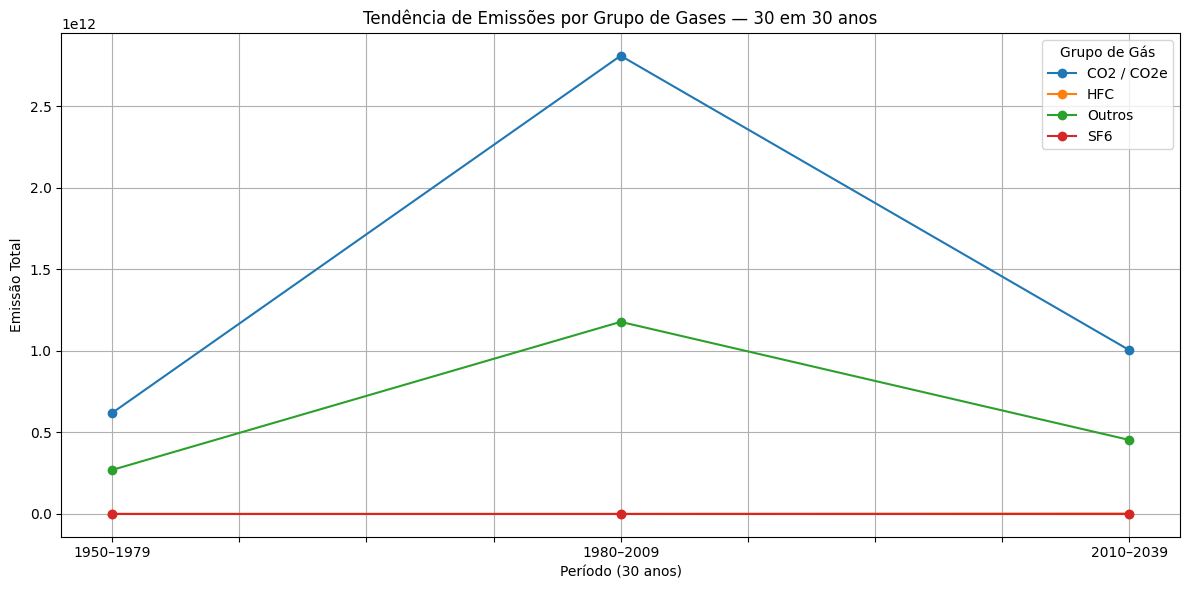

In [197]:
# Célula 10.4.2 — Gráfico de Linha (30 em 30 anos por Grupo de Gases)
'''
Gráfico de linha com agregação de 30 em 30 anos por grupo de gases.
Justificativa executiva:
- Visão histórica consolidada
- Evidencia transformações estruturais profundas
- Ideal para análises de sustentabilidade e políticas públicas
'''
plt.figure(figsize=(12, 6))
df_pivot_grupo_30_anos.plot(ax=plt.gca(), marker="o")
plt.title("Tendência de Emissões por Grupo de Gases — 30 em 30 anos")
plt.xlabel("Período (30 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Grupo de Gás")
plt.tight_layout()
plt.show()

# TODO:
## ajeitar toda a organização do processo do 11 (11.1. et cetera)

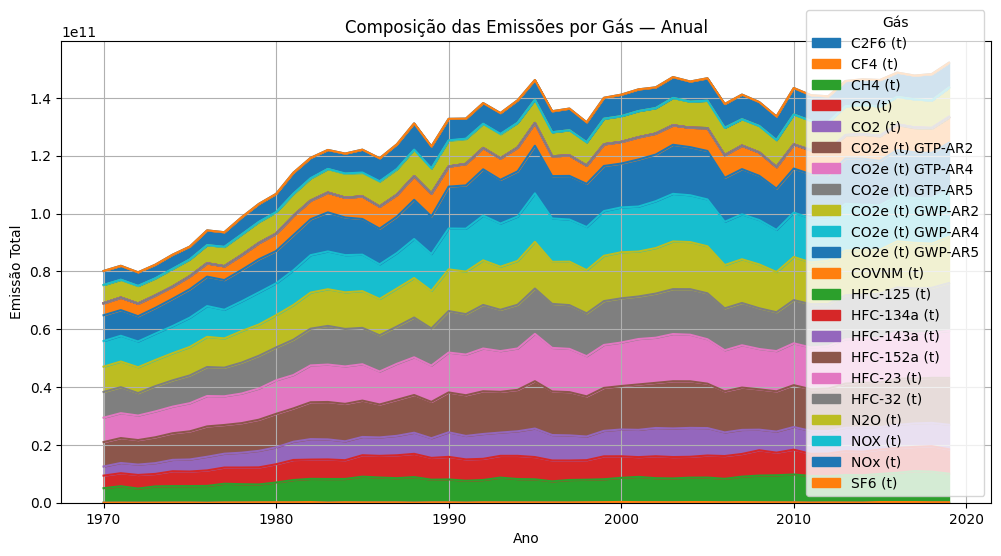

In [198]:
# Célula 11 — Gráfico de Área Empilhada (Composição Anual por Gás)

'''
Gráfico de área empilhada com granularidade anual.

Objetivos executivos:
- Evidenciar a composição das emissões ao longo do tempo
- Mostrar a contribuição relativa de cada gás no total anual
- Identificar mudanças graduais na matriz de emissões

Leitura:
- Cada área representa um gás
- A soma das áreas corresponde ao total anual de emissões
'''

plt.figure(figsize=(12,6))
df_pivot_ano.plot(kind="area", stacked=True, ax=plt.gca())

plt.title("Composição das Emissões por Gás — Anual")
plt.xlabel("Ano")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Gás")

plt.show()


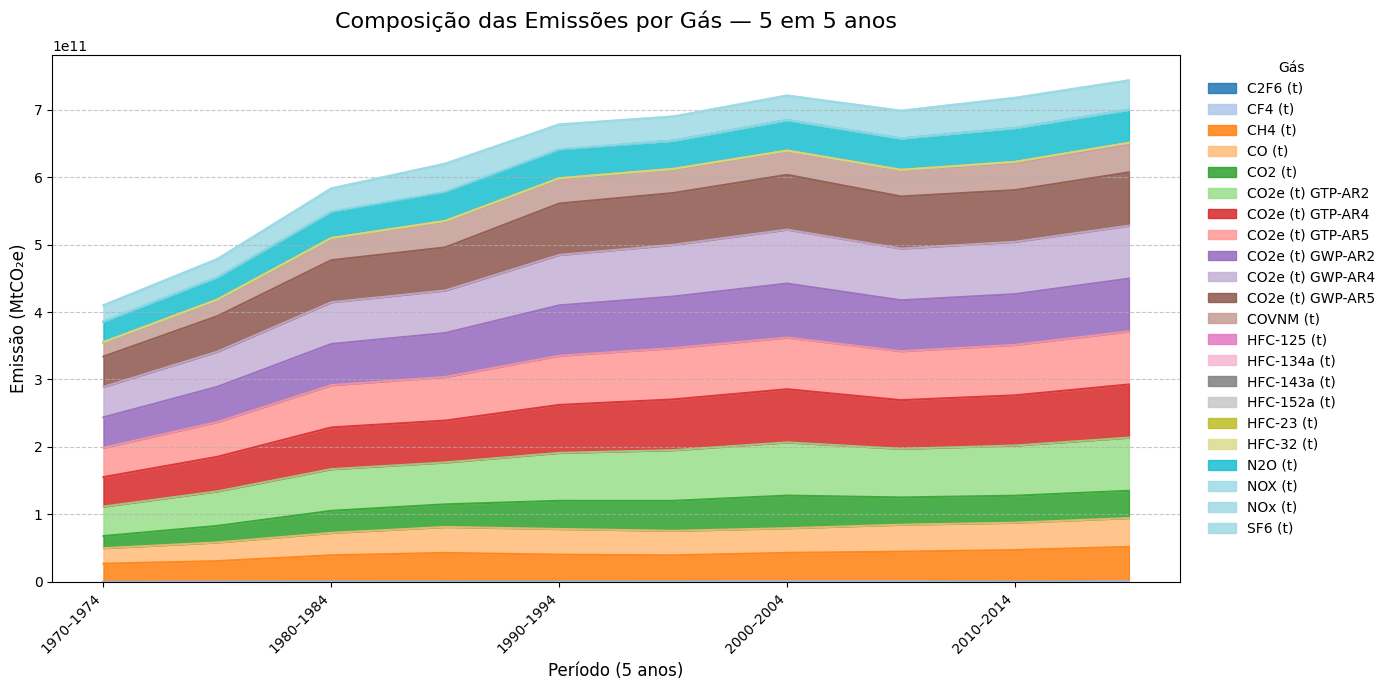

In [208]:
# Célula 11.1 — Gráfico de Área Empilhada (5 em 5 anos por Gás)
'''
Gráfico de área empilhada com agregação de 5 em 5 anos.
Correção:
- Paleta 'tab20' (20 cores distintas) – ideal para muitas colunas
- Legenda fora do gráfico (à direita)
- Unidade no eixo Y (MtCO₂e)
'''
import matplotlib.pyplot as plt

# ==================== PALETA DE CORES ====================
# tab20 tem 20 cores distintas; se houver mais colunas, tab20b + tab20c
num_cores = len(df_pivot_5_anos.columns)
cores = plt.cm.tab20(range(num_cores))  # ou tab20b, tab20c

# ==================== GRÁFICO ====================
plt.figure(figsize=(14, 7))

df_pivot_5_anos.plot(
    kind="area",
    stacked=True,
    ax=plt.gca(),
    color=cores,
    alpha=0.85
)

plt.title("Composição das Emissões por Gás — 5 em 5 anos", fontsize=16, pad=20)
plt.xlabel("Período (5 anos)", fontsize=12)
plt.ylabel("Emissão (MtCO₂e)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# ========== LEGENDA FORA ==========
plt.legend(
    title="Gás",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.tight_layout()
plt.show()

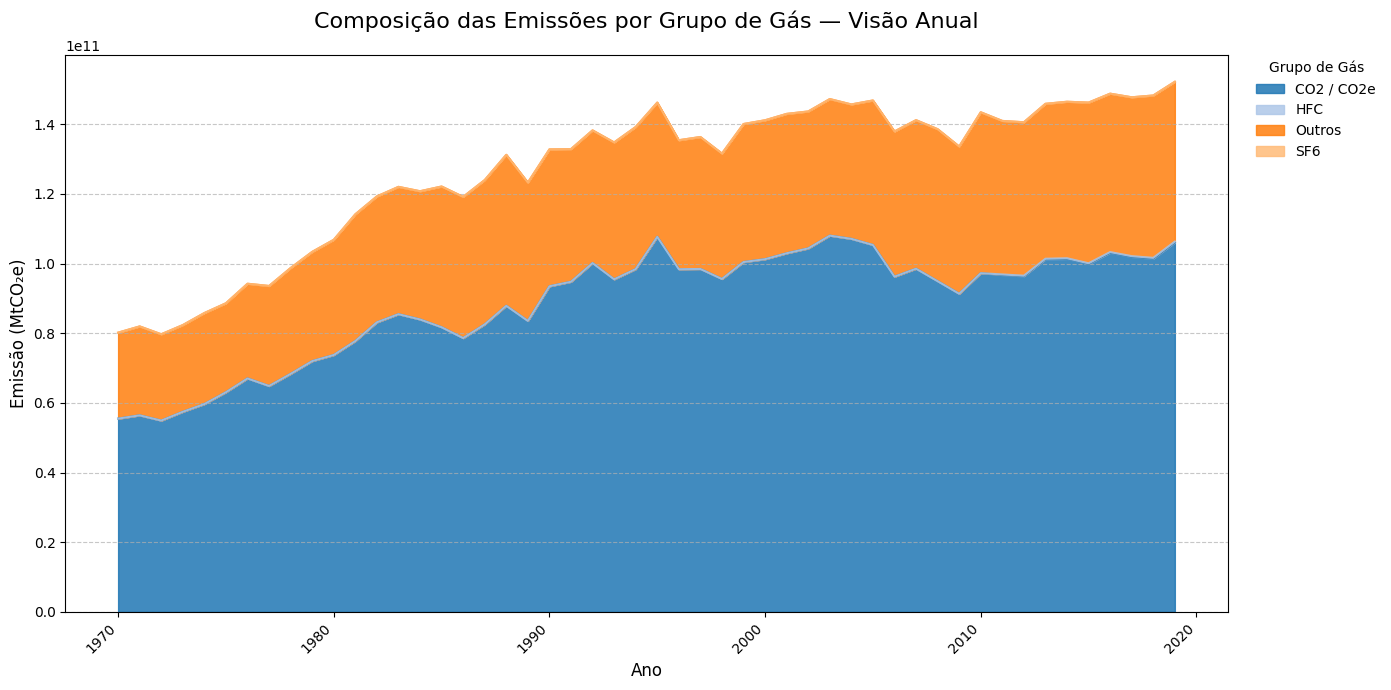

In [210]:
# Célula 11.1.1 — Gráfico de Área Empilhada (Anual por Grupo de Gás)
'''
Gráfico de área empilhada com granularidade anual (grupo de gases).
- Paleta tab20 (adaptada ao número de grupos)
- Legenda fora do gráfico
- Unidade MtCO₂e
'''
import matplotlib.pyplot as plt

num_cores = len(df_pivot_grupo_ano.columns)
cores = plt.cm.tab20(range(num_cores))

plt.figure(figsize=(14, 7))

df_pivot_grupo_ano.plot(
    kind="area",
    stacked=True,
    ax=plt.gca(),
    color=cores,
    alpha=0.85
)

plt.title("Composição das Emissões por Grupo de Gás — Visão Anual", fontsize=16, pad=20)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissão (MtCO₂e)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.legend(
    title="Grupo de Gás",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.tight_layout()
plt.show()

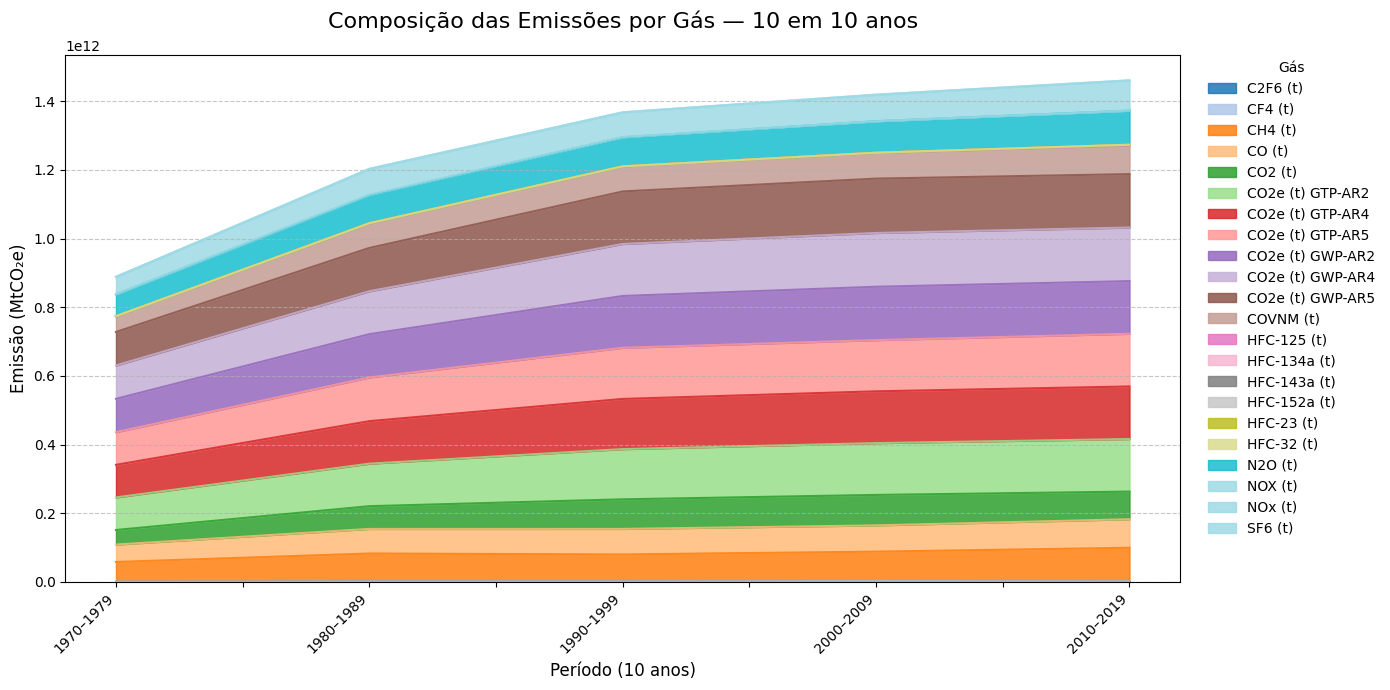

In [209]:
# Célula 11.2 — Gráfico de Área Empilhada (10 em 10 anos por Gás)
'''
Gráfico de área empilhada com agregação por décadas (gás individual).
- Paleta tab20
- Legenda fora do gráfico
- Unidade MtCO₂e
'''
import matplotlib.pyplot as plt

num_cores = len(df_pivot_10_anos.columns)
cores = plt.cm.tab20(range(num_cores))

plt.figure(figsize=(14, 7))

df_pivot_10_anos.plot(
    kind="area",
    stacked=True,
    ax=plt.gca(),
    color=cores,
    alpha=0.85
)

plt.title("Composição das Emissões por Gás — 10 em 10 anos", fontsize=16, pad=20)
plt.xlabel("Período (10 anos)", fontsize=12)
plt.ylabel("Emissão (MtCO₂e)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.legend(
    title="Gás",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.tight_layout()
plt.show()

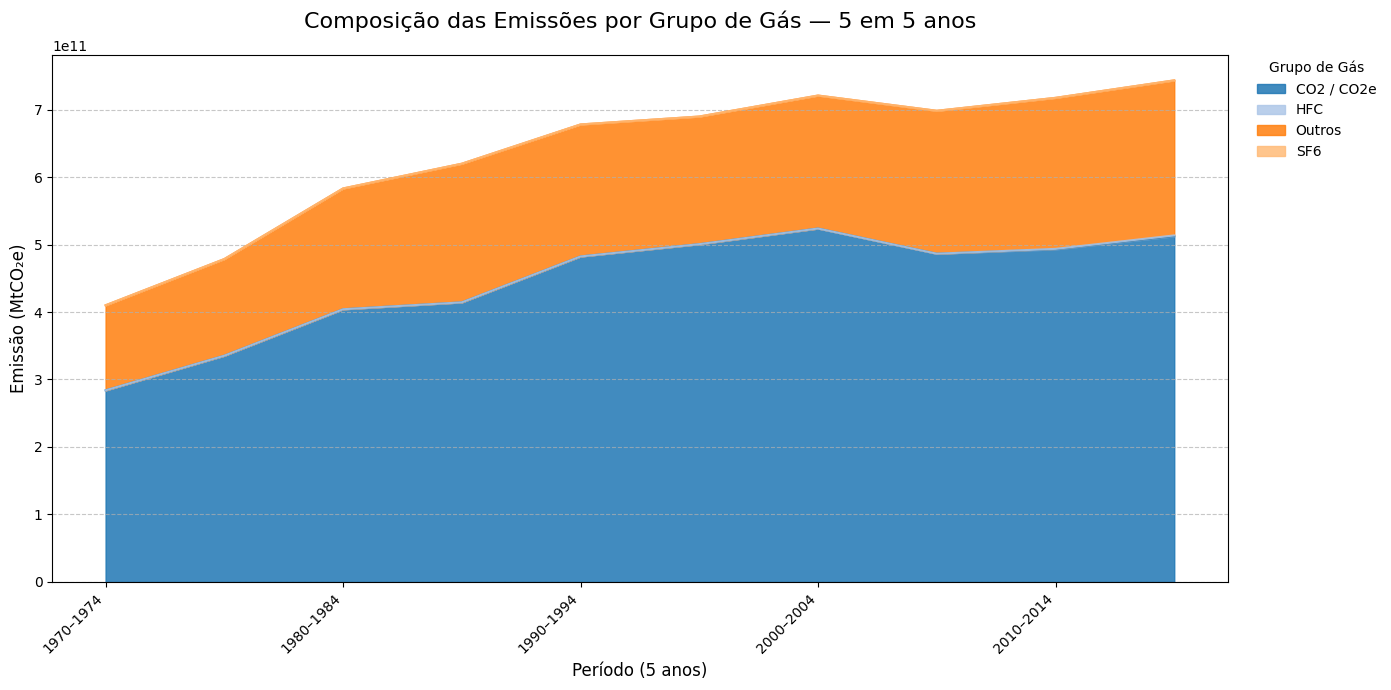

In [211]:
# Célula 11.2.1 — Gráfico de Área Empilhada (5 em 5 anos por Grupo de Gás)
'''
Gráfico de área empilhada com agregação de 5 em 5 anos (grupo de gases).
- Paleta tab20
- Legenda fora do gráfico
- Unidade MtCO₂e
'''
import matplotlib.pyplot as plt

num_cores = len(df_pivot_grupo_5_anos.columns)
cores = plt.cm.tab20(range(num_cores))

plt.figure(figsize=(14, 7))

df_pivot_grupo_5_anos.plot(
    kind="area",
    stacked=True,
    ax=plt.gca(),
    color=cores,
    alpha=0.85
)

plt.title("Composição das Emissões por Grupo de Gás — 5 em 5 anos", fontsize=16, pad=20)
plt.xlabel("Período (5 anos)", fontsize=12)
plt.ylabel("Emissão (MtCO₂e)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.legend(
    title="Grupo de Gás",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.tight_layout()
plt.show()

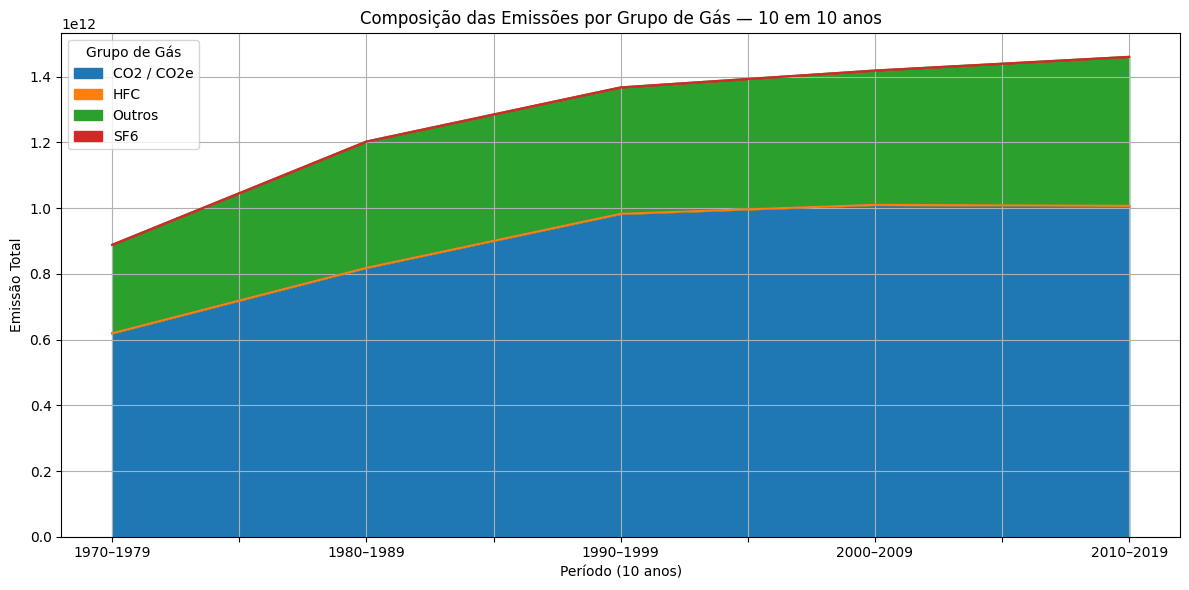

In [ ]:
# Célula 11.3 — Gráfico de Área Empilhada (30 em 30 anos por Gás)
'''
Gráfico de área empilhada com agregação de 30 em 30 anos (gás individual).
- Paleta tab20
- Legenda fora do gráfico
- Unidade MtCO₂e
'''
import matplotlib.pyplot as plt

num_cores = len(df_pivot_30_anos.columns)
cores = plt.cm.tab20(range(num_cores))

plt.figure(figsize=(14, 7))

df_pivot_30_anos.plot(
    kind="area",
    stacked=True,
    ax=plt.gca(),
    color=cores,
    alpha=0.85
)

plt.title("Composição das Emissões por Gás — 30 em 30 anos", fontsize=16, pad=20)
plt.xlabel("Período (30 anos)", fontsize=12)
plt.ylabel("Emissão (MtCO₂e)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.legend(
    title="Gás",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.tight_layout()
plt.show()

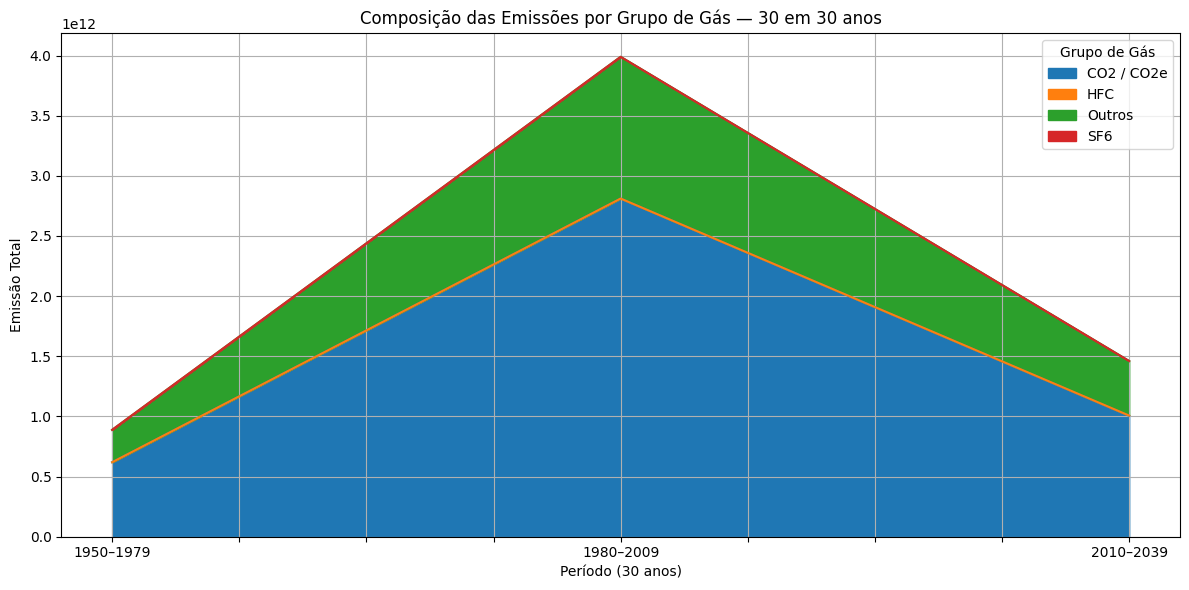

In [ ]:
# Célula 11.4.1 — Gráfico de Área Empilhada (30 em 30 anos por Grupo de Gás)
'''
Gráfico de área empilhada com agregação de 30 em 30 anos por grupo de gases.
Justificativa executiva:
- Visão macroambiental das emissões
- Evidencia transformações profundas na composição das emissões ao longo de grandes ciclos históricos
- Apoia relatórios de alto nível e políticas públicas
'''
plt.figure(figsize=(12, 6))
df_pivot_grupo_30_anos.plot(kind="area", stacked=True, ax=plt.gca())
plt.title("Composição das Emissões por Grupo de Gás — 30 em 30 anos")
plt.xlabel("Período (30 anos)")
plt.ylabel("Emissão Total")
plt.grid(True)
plt.legend(title="Grupo de Gás")
plt.tight_layout()
plt.show()

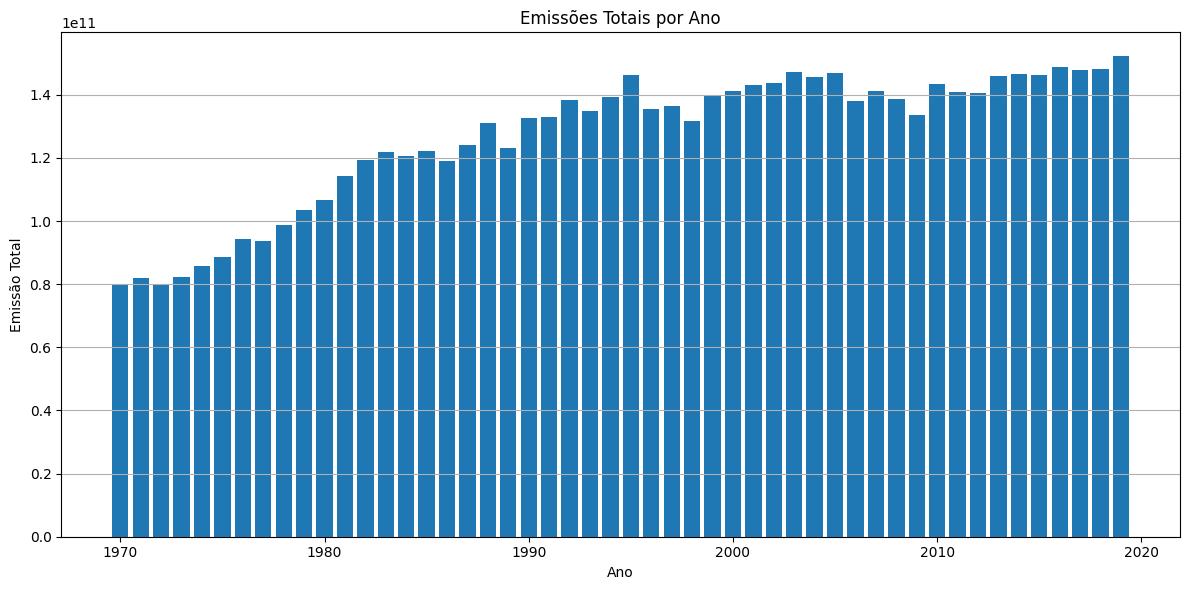

In [ ]:
# Célula 12 — Gráfico de Barras (Emissões Totais por Ano)
'''
Apresenta o volume total de emissões agregadas por ano.
Foco:
- Comparação direta entre anos específicos
- Leitura rápida para tomada de decisão
'''
df_total_ano = (
    df_agrupado
    .groupby("ano", as_index=False)["emissao"]
    .sum()
)
plt.figure(figsize=(12, 6))
plt.bar(df_total_ano["ano"], df_total_ano["emissao"])
plt.title("Emissões Totais por Ano")
plt.xlabel("Ano")
plt.ylabel("Emissão Total")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

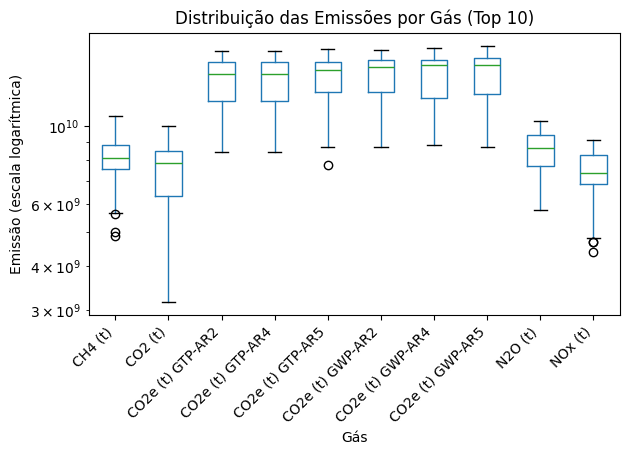

In [ ]:
# Célula 13 — Distribuição das Emissões por Gás (Boxplot Executivo)
'''
Visualização estatística focada em leitura executiva:
- Seleção apenas dos 10 gases com maior emissão total
- Escala logarítmica no eixo Y para lidar com grandes diferenças de magnitude
- Remoção visual de excesso de ruído
Leitura:    
- Cada box representa a variabilidade das emissões de um gás
- A linha central indica a mediana
- Pontos fora da caixa indicam eventos extremos
'''
top_gases = (
    df_agrupado
    .groupby("gas")["emissao"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
df_box = df_agrupado[df_agrupado["gas"].isin(top_gases)]
plt.figure(figsize=(14, 6))
df_box.boxplot(column="emissao", by="gas", grid=False)
plt.yscale("log")
plt.title("Distribuição das Emissões por Gás (Top 10)")
plt.suptitle("")
plt.xlabel("Gás")
plt.ylabel("Emissão (escala logarítmica)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()